# import necessary modules

In [31]:
# import necessary modules
%matplotlib inline
import read_mist_models
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from pylab import rcParams

# read in a model

In [36]:
# read in a 1 solar mass model track (all model tracks will be in the PHYS10045 folder)

eep = read_mist_models.EEP('PHYS10045_MIST/00100M.track.eep')


Reading in: PHYS10045_MIST/00100M.track.eep


## plot a colour-magnitude diagram, labelling phases

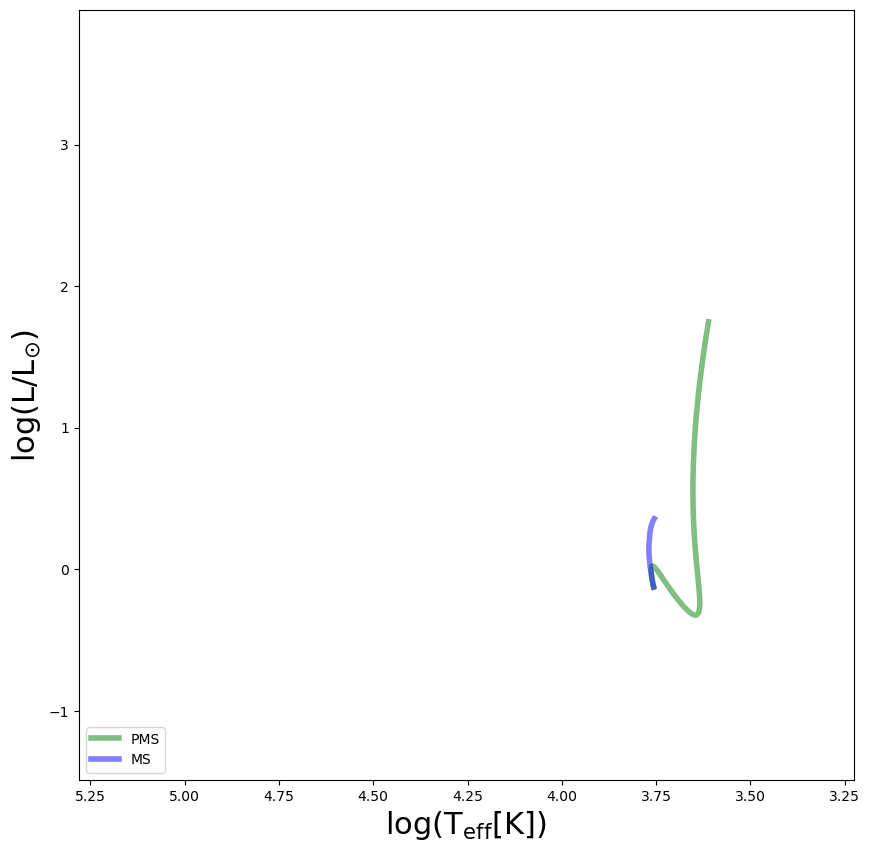

In [43]:
x = eep.eeps['log_Teff']
y = eep.eeps['log_L']
        
fig = plt.figure(figsize=(10, 10))
        
ax = fig.add_subplot(111)
#ax.plot(x, y)
plt.axis([max(x)+0.2, min(x)-0.2, min(y)-0.2, max(y)+0.2])

ax.set_xlabel(r'log(T$_\mathrm{eff}$[K])', fontsize=22)
ax.set_ylabel(r'log(L/L$_{\odot}$)', fontsize=22)

phases = [-1, 0, 2, 3, 4, 5, 6]
phasecolor = ['green', 'blue', 'red', 'magenta', 'orange', 'yellow','cyan']

p = eep.eeps['phase']

p_ind = np.where(p == phases[0])
ax.plot(x[p_ind], y[p_ind], color=phasecolor[0], linewidth=4.0, alpha=0.5, label='PMS')

p_ind = np.where(p == phases[1])
ax.plot(x[p_ind], y[p_ind], color=phasecolor[1], linewidth=4.0, alpha=0.5, label='MS')

ax.legend(loc=3)